In [1]:
import IRF_Simulator as irfsim
import MC_PHD as mcphd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
phd, phd_times = mcphd.MCPHD(uaBulk=0.04, 
                                usBulk=10, 
                                g=0.9, 
                                n=1.4, 
                                sdSep=20, 
                                slabThickness=60, 
                                detRad=3, 
                                isRefl=True, 
                                maxTime=5e-9, 
                                nPhotons=5e8, 
                                nTimeBins=4096)

[[0, 0, 1, 1], [0.04, 10, 0.9, 1.4]]
nphoton: 5e+08
tstart: 0
tstep: 5e-09
tend: 5e-09
issrcfrom0: 1
issavedet: 1
Simulation took 15.483998775482178 seconds.


###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2025 Qianqian Fang <q.fang at neu.edu>          #
#                https://mcx.space/  &  https://neurojson.io                  #
#                                                                             #
# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #
#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #
###############################################################################
#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #
###############################################################################
#  Open-source codes and reusable scientific data are essential for research, #
# MCX proudly developed human-readable JSON-based data formats for easy reuse.#
#                                       

In [3]:
irf, irf_times = irfsim.generate_instrument_function_multi_peak(
    photon_count=2000000,   
    time_range_ns=25,
    time_resolution_ps=6.1,
    peak_widths_ps=[350.0, 550, 700.0, 2500],
    jitter_std_dev_ps=30.0,
    detector_response_type="gaussian",
    detector_response_params={'fwhm_ps': 40.0},
    peak_delays_ps=[5000, 5200, 5800, 6000],
    peak_ratios=[1.0, 0.6, 0.3, 1],
    avg_noise_floor=200,
    sd_noise_floor=20
)

irf = irf - np.min(irf)
irf = irf / np.sum(irf)

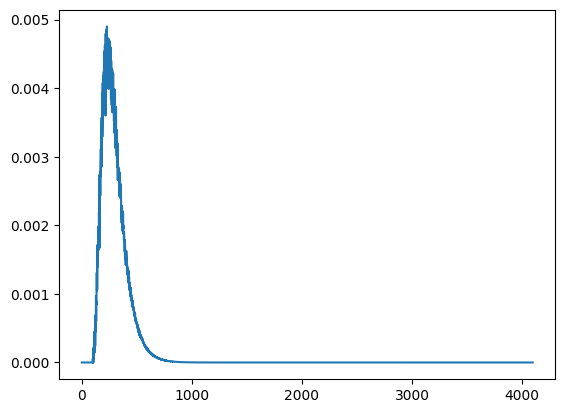

In [4]:
plt.plot(phd[0])

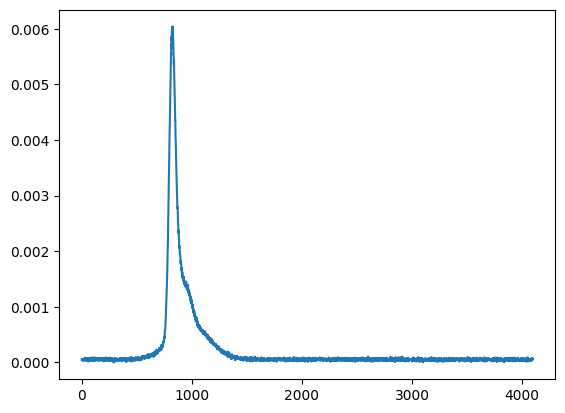

In [5]:
plt.plot(irf)

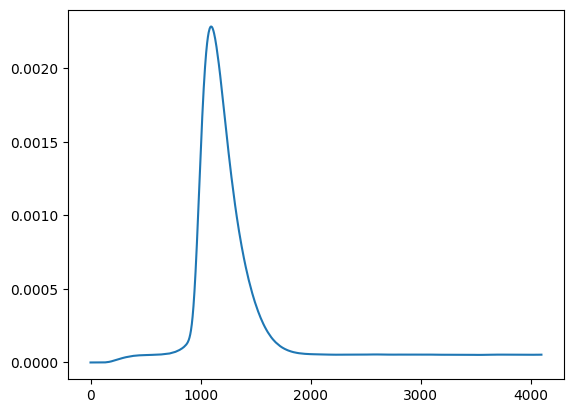

In [6]:
datapoint = np.convolve(irf, phd[0], mode='full')[:len(phd[0])]
plt.plot(datapoint)

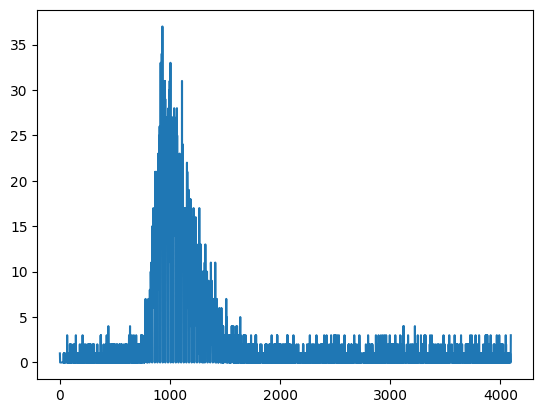

In [47]:
num_photons = 10000

probabilities = datapoint / np.sum(datapoint)

# Generate random times of flight based on the distribution
bins = np.arange(len(datapoint)) #assuming the histogram is binned with integer bin numbers.
simulated_arrival_times = np.random.choice(bins, size=num_photons, p=probabilities)

histo = np.histogram(simulated_arrival_times, bins=len(bins))

plt.plot(histo[0])